INFO:01_Data:Fetching 2 years of history for: ['XLE', 'QQQ', 'BND', 'GLD', 'XLF']
--- Descriptive Statistics (Daily Returns) ---


,XLE,QQQ,BND,GLD,XLF
count,501.000000,501.000000,501.000000,501.000000,501.000000
mean,0.000759,0.000765,0.000233,0.001924,0.000673
std,0.013848,0.013223,0.002984,0.013134,0.010802
min,-0.091999,-0.062109,-0.012056,-0.102742,-0.073181
25%,-0.006355,-0.004499,-0.001658,-0.004391,-0.004592
50%,0.002241,0.001582,0.000276,0.002057,0.001287
75%,0.008494,0.007654,0.002158,0.009062,0.006442
max,0.077446,0.120031,0.011418,0.063587,0.075364


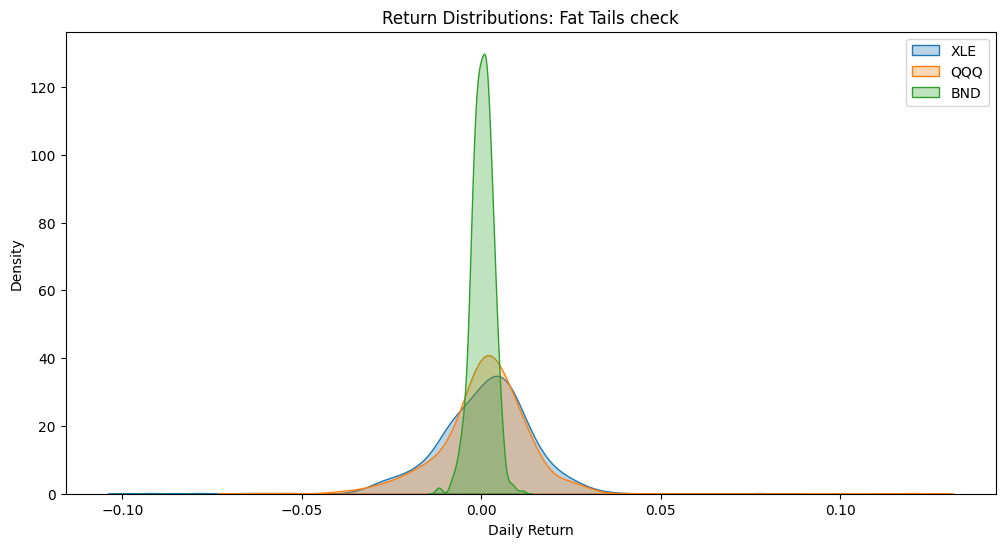

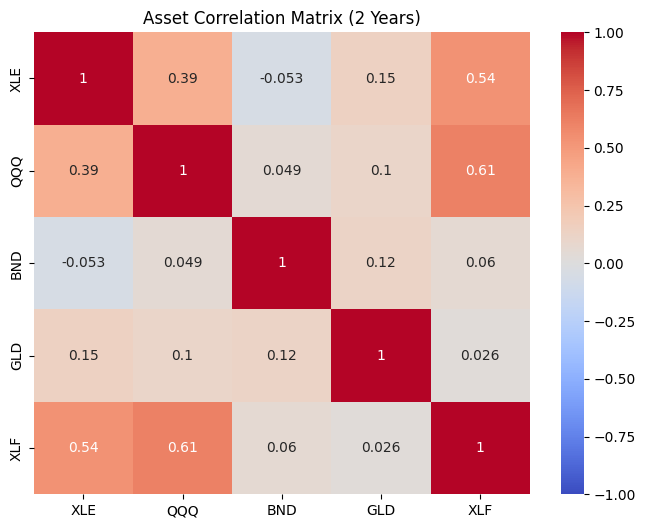

In [1]:
# Cell 1: Setup
import sys
import os
import logging
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path Discovery
current_dir = os.getcwd()
if current_dir.endswith("notebooks"):
    sys.path.append(os.path.abspath(os.path.join(current_dir, "..")))
else:
    sys.path.append(current_dir)

from src.connectors.yahoo_connector import YahooConnector

# Logger
logging.basicConfig(level=logging.INFO, stream=sys.stdout)
logger = logging.getLogger("01_Data")

# Cell 2: Fetch Data
connector = YahooConnector()
tickers = ["XLE", "QQQ", "BND", "GLD", "XLF"]
logger.info(f"Fetching 2 years of history for: {tickers}")

data_map = {}
for t in tickers:
    df = connector.get_historical_returns(t, period="2y")
    if not df.empty:
        data_map[t] = df

df_returns = pd.DataFrame(data_map).dropna()

# Cell 3: Risk Analysis (Distributions)
print("--- Descriptive Statistics (Daily Returns) ---")
display(df_returns.describe())

plt.figure(figsize=(12, 6))
for t in ["XLE", "QQQ", "BND"]:
    sns.kdeplot(df_returns[t], fill=True, label=t, alpha=0.3)
plt.title("Return Distributions: Fat Tails check")
plt.xlabel("Daily Return")
plt.legend()
plt.show()

# Cell 4: Correlation (The Hedge Matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(df_returns.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Asset Correlation Matrix (2 Years)")
plt.show()